In [42]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 33)

### 建模

- **n_neighbor**: K  
- **weights**: `'uniform'` / `'distance'` / 其他  
- **algorithm**: `'auto'` / `'brute'` / `'kd_tree'` / `'ball_tree'`  
- **p**:  
  - `1` → 曼哈頓距離  
  - `2` → 歐基里德距離  
  - 其他: 明氏距離

In [45]:
clf = KNeighborsClassifier(n_neighbors= 3, p = 1, weights='distance', algorithm='brute') #weights='distance'加權距離
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3, p=1, weights='distance')

In [46]:
clf.predict(X_test)

array([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0,
       2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       0])

In [47]:
clf.score(X_train, y_train)

1.0

In [48]:
clf.score(X_test, y_test)

0.9777777777777777

### 尋找合適的 K 值 (KNN 模型)

In [49]:
#檢查訓練資料集大小
len(X_train)

105

/Users/ning/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ning/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ning/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ning/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ning/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 

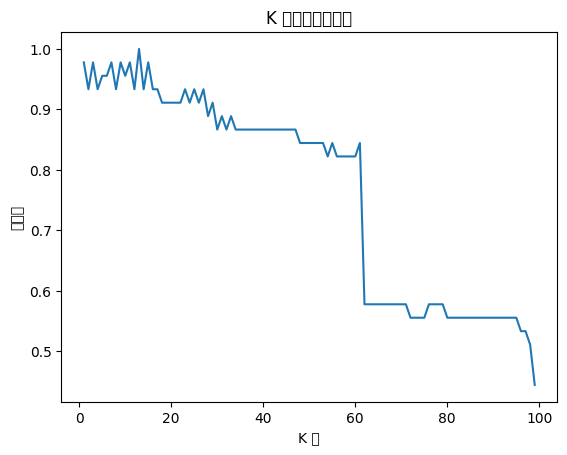

In [50]:
accuracy = []

# 測試不同的 K 值
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

# 繪製準確率曲線
k_range = range(1, 100)
plt.plot(k_range, accuracy)
plt.xlabel('K 值')
plt.ylabel('準確率')
plt.title('K 值與準確率曲線')
plt.show()